<a href="https://colab.research.google.com/github/Bunny-Poornendu/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

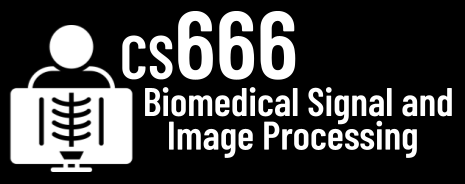

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.4 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:

from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [35]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [36]:
import biosppy
df = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=1000,show=False)
rpeaks = df['rpeaks']
filtered = df['filtered']


**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

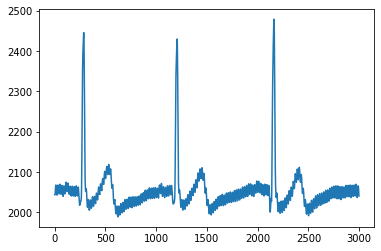

In [37]:
plt.plot(signal[0:3000])

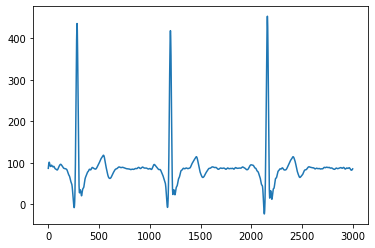

In [38]:
plt.plot(filtered[0:3000])

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

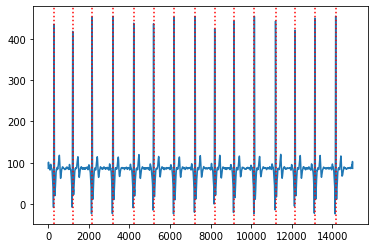

In [39]:
plt.plot(filtered)
for i in rpeaks:
  plt.axvline(x = i, color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [40]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


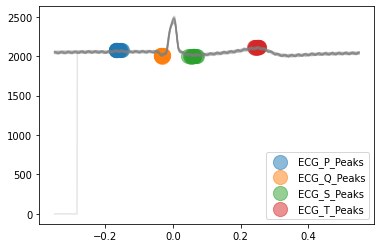

In [41]:


_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')


In [42]:
# TODO Does the detection work well?
#Yes the detection works well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

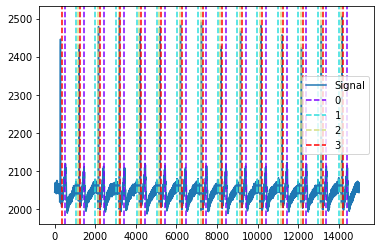

In [20]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']],signal)


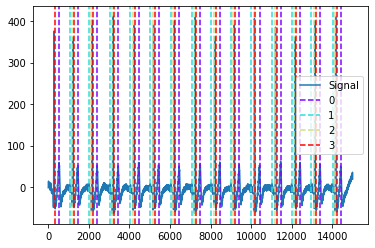

In [33]:
# TODO Let's filter the signal and see if the detection improves.
filterednk = nk.signal_filter(signal, sampling_rate=1000, lowcut=1, highcut=45, method='butterworth', order=2, window_size='default', powerline=50, show=False)
# Hint: You can use nk.signal_filter to define a bandpass.
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']],filterednk)
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

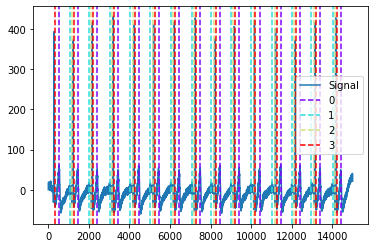

In [29]:
# Finally, run the delineation on the filtered signal from BioSPPY.
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']],filtered)


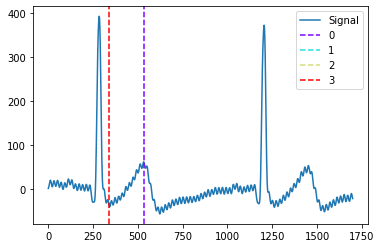

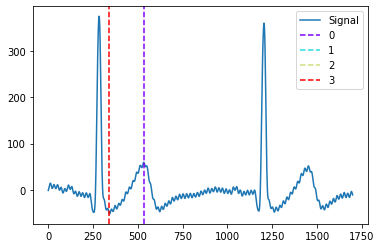

In [34]:
# TODO Which one works the best?
#I printed two plots one for biosppy and nk .The plot of filtered signal from nk works the best in this case
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:1], 
                       waves_peak['ECG_P_Peaks'][:1],
                       waves_peak['ECG_Q_Peaks'][:1],
                       waves_peak['ECG_S_Peaks'][:1]], filtered[:1700])
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:1], 
                       waves_peak['ECG_P_Peaks'][:1],
                       waves_peak['ECG_Q_Peaks'][:1],
                       waves_peak['ECG_S_Peaks'][:1]], filterednk[:1700])

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#